In [1]:
%matplotlib inline
#--------------------
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft
import os
import wave

In [2]:
def Y(N,L,x,b,f = lambda l:1):
    y = np.zeros(N)
    for n in range(N):
        for l in range(L):
            y[n] += x[n-l] * b[l]*f(l)
    return y

In [3]:
#Params
w = 0.38
L = 128
N = 2000

x = np.zeros(N)
x[0] = 1

b = [np.sin(2*np.pi*w*(l-L/2))/(np.pi*(l-L/2)) for l in np.arange(L)]
b = np.array(b)
b[int(L/2)] = 2*w

f = lambda l: 0.54-0.46*np.cos(np.pi*2*(l/L)) 
f.__doc__ = """hamming window"""

/tmp/ipykernel_4287/1546233796.py:9: RuntimeWarning: invalid value encountered in double_scalars
  b = [np.sin(2*np.pi*w*(l-L/2))/(np.pi*(l-L/2)) for l in np.arange(L)]


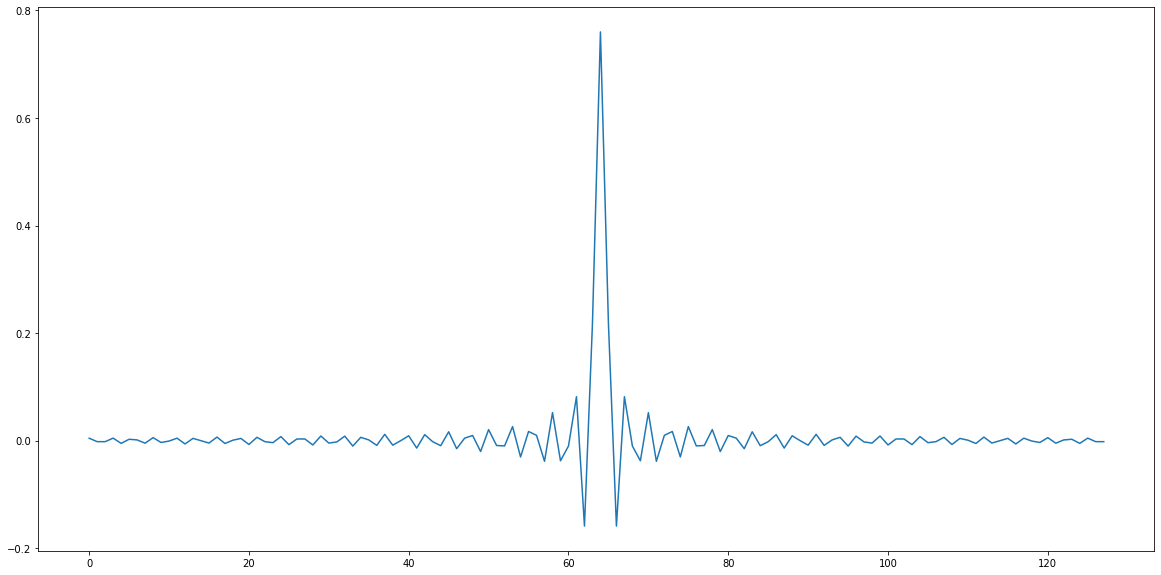

In [4]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(L),b)
plt.show()


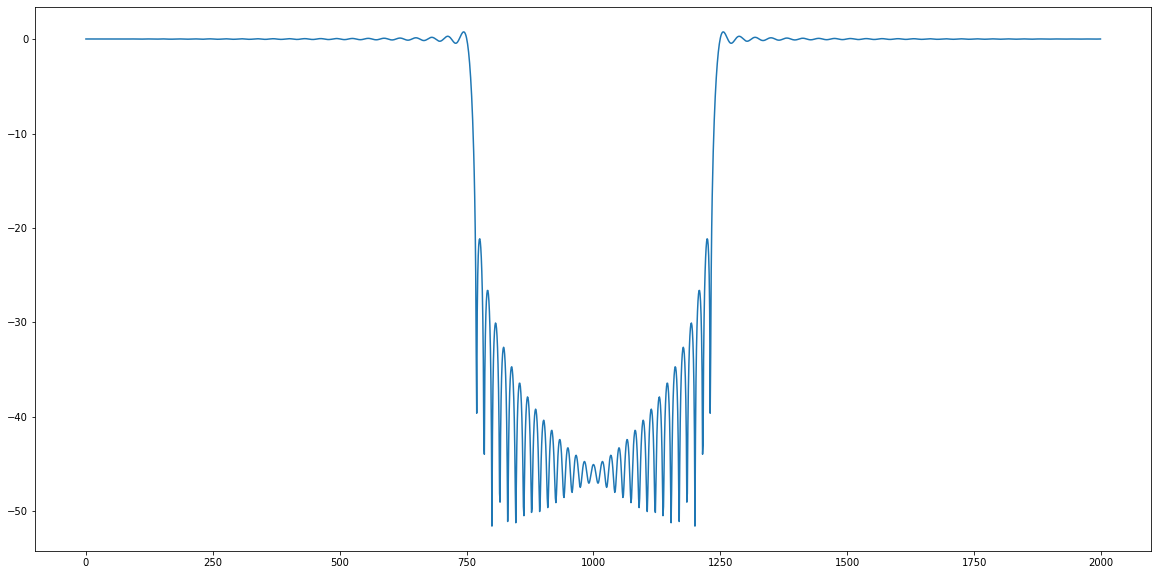

In [5]:
y = Y(N,L,x,b)
res = np.abs(fft(y))
res = np.log10(res)*20

plt.figure(figsize=(20,10))
plt.plot(np.arange(N),res)
plt.show()

In [6]:
temp = np.zeros(L)
for l in np.arange(L):
    temp[l] = b[l] * f(l)
print(f'new b with hamming window:\n {temp}')

new b with hamming window:
 [ 3.60019245e-04 -1.49827647e-04 -1.55383328e-04  4.01232857e-04
 -4.48237043e-04  2.43758305e-04  1.36220729e-04 -5.03990564e-04
  6.42179827e-04 -4.22381662e-04 -9.92318454e-05  6.73058296e-04
 -9.62355710e-04  7.28568122e-04 -1.38054432e-17 -8.85655689e-04
  1.42116848e-03 -1.20586905e-03  2.15240368e-04  1.10586608e-03
 -2.02126430e-03  1.89701055e-03 -6.09078407e-04 -1.28409248e-03
  2.75458910e-03 -2.84345539e-03  1.25339742e-03  1.35618639e-03
 -3.60226018e-03  4.08689877e-03 -2.23215491e-03 -1.24120915e-03
  4.53529000e-03 -5.67419664e-03  3.64895631e-03  8.35721951e-04
 -5.51613074e-03  7.66873076e-03 -5.64465855e-03  5.20258639e-17
  6.50093912e-03 -1.01751448e-02  8.43748599e-03 -1.47513380e-03
 -7.44240013e-03  1.33958725e-02 -1.24199146e-02  3.95298005e-03
  8.29289916e-03 -1.77771034e-02  1.84244438e-02 -8.19770992e-03
 -9.00780035e-03  2.44696613e-02 -2.86287505e-02  1.62860445e-02
  9.54857671e-03 -3.73615854e-02  5.10797524e-02 -3.69037192e-

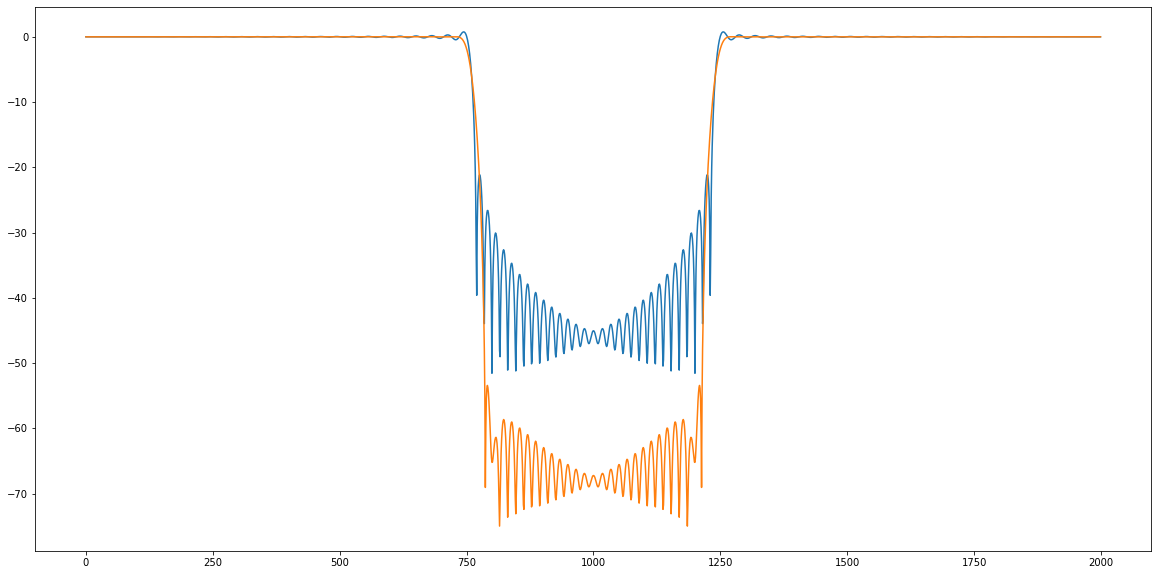

In [7]:
y2 = Y(N,L,x,b,f)       
res2 = np.abs(fft(y2))
res2 = np.log10(res2)*20

plt.figure(figsize=(20,10))
plt.plot(np.arange(N),res)
plt.plot(np.arange(N),res2)
plt.show()

Вопрос: 5)	Привести количественные результаты – как изменились характеристики фильтра (ширина полосы пропускания, пульсации АЧХ в полосах пропускания и задержки) после взвешивания?


Ответ: Взвешенный фильтр чуть лучше подавляет высокиечастотыза пределами пропускания (амплитуды скачков практически не отличаются, они, лишь, несколько меньше, причём по мере увеличения кол-ва отсчётов эффективность подавления возрастает). При этом число пульсаций  у  взвешенного  фильтра  выше,  чем  у  невзвешенного,  но  скачок  амплитуды несколько  меньше  возле  границы  полосы  пропускания.  Наличие  окна,  кроме  того, позволяет ещё немного уменьшить значения амплитуды на полосе пропускания.

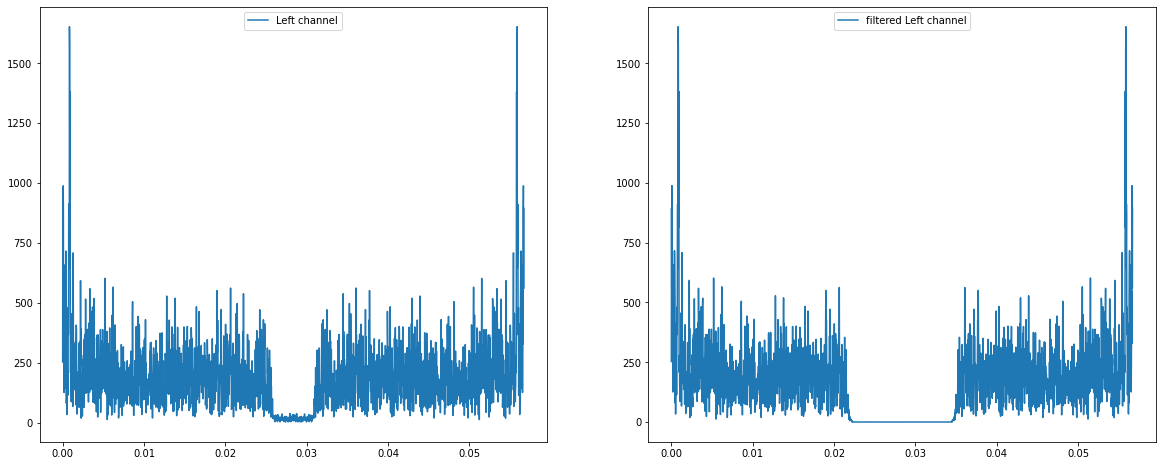

In [8]:
file_name = 'Starset_Monster.wav'
file_path = os.path.join(os.path.abspath(os.getcwd()),'..',file_name)
sample_rate, data = wavfile.read(file_path)
t = 0
samples = data[t:t+2500,0]
length = samples.shape[0] / sample_rate
time = np.linspace(0., length, samples.shape[0])

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(time, np.abs(fft(samples)), label="Left channel")
plt.legend()

y = Y(samples.shape[0],L,samples,b,f)
plt.subplot(122)
plt.plot(time, np.abs(fft(y)), label="filtered Left channel")
plt.legend()
plt.show()